In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


No strange dtype in the dataset

In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
numerical=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
categorical=['Email', 'Address', 'Avatar']

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Numerical features have no strange data

In [7]:
for col in categorical:
    print(col,df[col].nunique(),sep='  -->  ')

Email  -->  500
Address  -->  500
Avatar  -->  138


In [8]:
df['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

Categorical features have no strange data but we won't use them

In [9]:
df.drop(categorical,axis=1,inplace=True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.corr()['Yearly Amount Spent']

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

'Time on Website' has no correlation with 'Yearly Amount Spent'

In [11]:
df.drop('Time on Website',axis=1,inplace=True)
numerical.remove('Time on Website')
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


<AxesSubplot:ylabel='Yearly Amount Spent'>

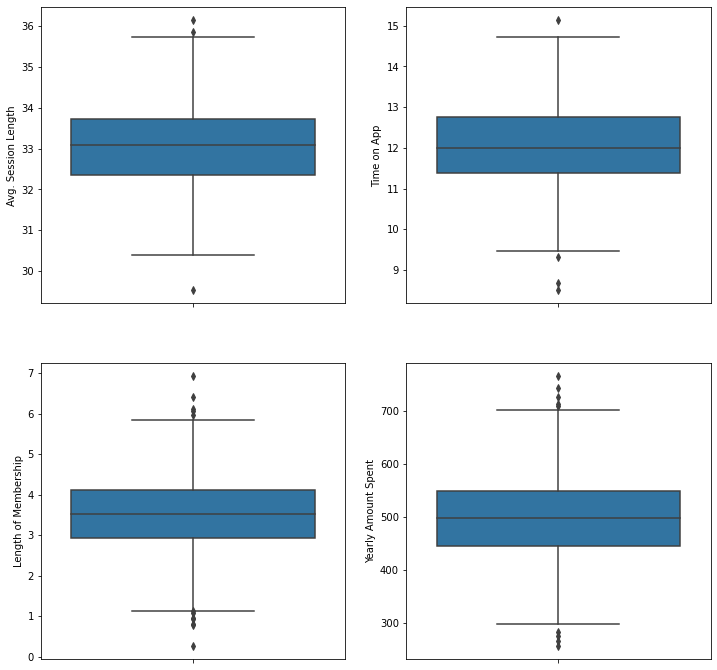

In [12]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
sns.boxplot(data=df,y=numerical[0],ax=axes[0,0])
sns.boxplot(data=df,y=numerical[1],ax=axes[0,1])
sns.boxplot(data=df,y=numerical[2],ax=axes[1,0])
sns.boxplot(data=df,y=numerical[3],ax=axes[1,1])

In [13]:
for col in numerical:
    print(col)
    outliers=df.loc[detect_outliers(df,0,[col]),col]
    print(outliers)
    print()

Avg. Session Length
12     29.532429
154    36.139662
390    35.860237
Name: Avg. Session Length, dtype: float64

Time on App
65     15.126994
309     8.508152
362     9.316289
442     8.668350
Name: Time on App, dtype: float64

Length of Membership
50     5.976768
151    6.401229
153    6.076654
157    6.922689
161    0.968622
173    0.801516
225    0.789520
303    1.084585
379    1.130477
396    6.115199
434    0.936498
447    0.269901
Name: Length of Membership, dtype: float64

Yearly Amount Spent
50     725.584814
65     765.518462
157    744.221867
205    712.396327
225    256.670582
299    282.471246
303    266.086341
368    708.935185
415    275.918421
Name: Yearly Amount Spent, dtype: float64



outliers are not bad so we won't deal with them

In [14]:
df.isna().sum()

Avg. Session Length     0
Time on App             0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


Splitting the dataset

In [16]:
x=df.drop('Yearly Amount Spent',axis=1)
y=df['Yearly Amount Spent']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
print(f"{x_train.shape} ==> {y_train.shape}")
print(f"{x_test.shape} ==> {y_test.shape}")

(400, 3) ==> (400,)
(100, 3) ==> (100,)


feature scaling

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

try different regression models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [23]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print('-----------------------------------------------------------')

Using model: LinearRegression
RMSE: 9.310502965083604
R2 Score: 0.9880168043003342
-----------------------------------------------------------
Using model: KNeighborsRegressor
RMSE: 21.666674456440788
R2 Score: 0.9351050529304522
-----------------------------------------------------------
Using model: SVR
RMSE: 61.13350976463295
R2 Score: 0.4833635703302941
-----------------------------------------------------------
Using model: DecisionTreeRegressor
RMSE: 25.89137521880253
R2 Score: 0.9073305461376577
-----------------------------------------------------------
Using model: RandomForestRegressor
RMSE: 18.110944761878645
R2 Score: 0.954657174598854
-----------------------------------------------------------
Using model: XGBRegressor
RMSE: 15.94553042748174
R2 Score: 0.9648517013700947
-----------------------------------------------------------


LinearRegression model gives the best results

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [25]:
y_test

427    581.798798
167    578.986259
223    604.334840
259    375.398455
189    478.885391
          ...    
393    482.830986
410    608.271817
39     537.846195
118    506.547307
484    462.656519
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [26]:
y_predict

array([576.91222851, 573.26737011, 599.75011123, 374.98045866,
       472.44378009, 494.32237799, 468.78799875, 569.56024032,
       442.68105697, 508.6332562 , 601.70180077, 529.24881157,
       422.55493087, 481.23253079, 443.13885352, 447.50588881,
       588.31852903, 372.20450842, 404.78678404, 605.55209857,
       656.7470079 , 564.40496987, 564.66204645, 547.66903036,
       511.74990256, 484.30867004, 595.34812951, 573.15621855,
       480.01638223, 566.4388721 , 523.46765445, 473.13302683,
       349.73715161, 532.50023918, 513.24466435, 553.42493396,
       396.09794326, 530.76674699, 493.67997681, 380.17404151,
       456.37557335, 683.70008754, 533.79500906, 477.87939659,
       576.41071131, 499.05497123, 593.59897194, 552.41449285,
       455.8036077 , 513.42947554, 702.58718845, 575.57456008,
       255.82873009, 590.1658349 , 500.30984951, 397.1897678 ,
       314.53995346, 428.87101443, 460.5837234 , 424.45986809,
       563.00907798, 504.91999151, 517.84970776, 411.50

In [27]:
import joblib

In [28]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']